# Exercícios

1. Implemente a DCT-II para uma imagem em escala de cinza. Utilize o método de *grayscale* de sua escolha.

Obs.: A DCT-II 2D apresentada possui complexidade `O(n⁴)`. Sendo assim, considere que a imagem tem altura e largura múltiplos de 8 e aplique a DCT em blocos 8x8. Veja imagens contidas na sua pasta.

$$\begin{align*}
X_{k_1,k_2}&=\alpha_{k_1}\sum_{n_1=0}^{N_1-1}\alpha_{k_2}\left(\sum_{n_2=0}^{N_2-1}x_{n_1,n_2}\cos\left[\frac{\pi}{N_2}\left(n_2+\frac{1}{2}\right)k_2\right]\right)\cos\left[\frac{\pi}{N_1}\left(n_1+\frac{1}{2}\right)k_1\right]\\
&=\alpha_{k_1}\alpha_{k_2}\sum_{n_1=0}^{N_1-1}\sum_{n_2=0}^{N_2-1}x_{n_1,n_2}\cos\left[\frac{\pi}{N_1}\left(n_1+\frac{1}{2}\right)k_1\right]\cos\left[\frac{\pi}{N_2}\left(n_2+\frac{1}{2}\right)k_2\right]\quad k_1,k_2=0,\dots,N-1
\end{align*}$$

$\alpha_{k_1}=\begin{cases}
    \frac{1}{\sqrt{N_1}}, & \text{se}\ k_1=0\\
    \sqrt{\frac{2}{N_1}}, & \text{caso contrário}
\end{cases}$

$\alpha_{k_2}=\begin{cases}
    \frac{1}{\sqrt{N_2}}, & \text{se}\ k_2=0\\
    \sqrt{\frac{2}{N_2}}, & \text{caso contrário}
\end{cases}$

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

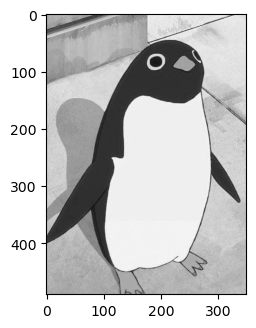

In [16]:
pingu = np.array(Image.open("pingu.jpg"))[:,:,:3] 

def greyscale(img):
    res = (img[:,:,0] * 0.2126 + 
           img[:,:,1] * 0.7152 + 
           img[:,:,2] * 0.0722).astype(np.uint8)
    
    return res

pingu_gray = greyscale(pingu)

plt.figure(figsize=(8,8))
plt.subplot(2,2,1)
plt.imshow(pingu_gray, cmap="gray")

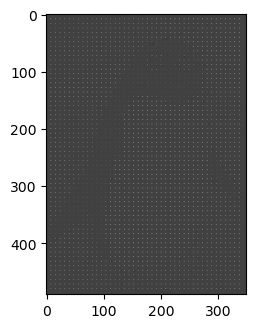

In [20]:
def dct(img):
    l, c = img.shape

    dct = np.zeros(shape=img.shape)
    for k1 in range(l): 
        if k1 == 0:
            a1 = 1 / np.sqrt(l)
        else:
            a1 = np.sqrt(2 / l)

        for k2 in range(c): 
            sum_n1 = 0

            for n1 in range(l):
                sum_n2 = 0
                for n2 in range(c):
                    x = img[n1, n2]
                    sum_n2 += x * np.cos(np.pi / c * (n2 + 0.5) * k2)

                sum_n1 += sum_n2 * np.cos(np.pi / l * (n1 + 0.5) * k1)

            if k2 == 0:
                a2 = 1 / np.sqrt(c)
            else:
                a2 = np.sqrt(2 / c)

            dct[k1, k2] = sum_n1 * a1 * a2

    return dct

(l, c) = pingu_gray.shape

pingu_dct = np.zeros(shape=pingu_gray.shape)

block_size = 8
num_blocks_l = l // block_size
num_blocks_c = c // block_size

for b1 in range(num_blocks_l):
    i = b1 * block_size
    for b2 in range(num_blocks_c):
        j = b2 * block_size
        x = pingu_gray[i:i + block_size, j:j + block_size]
        pingu_dct[i:i + block_size, j:j + block_size] = dct(x)

plt.figure(figsize=(8,8))
plt.subplot(2, 2, 1)
plt.imshow(pingu_dct, cmap='gray')
plt.show()

2. Implemente a DCT-III (IDCT) para reverter a DCT-II implementada no exercício acima.

$$x_{n_1,n_2}=\sum_{k_1=0}^{N_1-1}\sum_{k_2=0}^{N_2-1}\alpha_{k_1}\alpha_{k_2}X_{k_1,k_2}\cos\left[\frac{\pi}{N_1}n_1\left(k_1+\frac{1}{2}\right)\right]\cos\left[\frac{\pi}{N_2}n_2\left(k_2+\frac{1}{2}\right)\right]\quad n_1,n_2=0,\dots,N-1$$

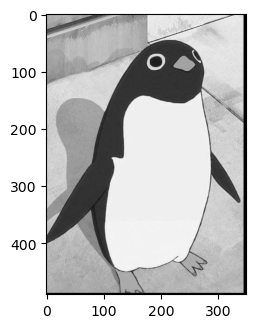

In [19]:
def idct(img):
    l, c = img.shape

    idct = np.zeros(shape=img.shape)
    for n1 in range(l):
        for n2 in range(c): 
            sum_k1 = 0

            for k1 in range(l):
                if k1 == 0:
                    a1 = 1 / np.sqrt(l)
                else:
                    a1 = np.sqrt(2 / l)

                sum_k2 = 0
                for k2 in range(c):
                    if k2 == 0:
                        a2 = 1 / np.sqrt(c)
                    else:
                        a2 = np.sqrt(2 / c)

                    x = img[k1, k2]
                    sum_k2 += x * np.cos(np.pi / c * (n2 + 0.5) * k2) * a2

                sum_k1 += sum_k2 * np.cos(np.pi / l * (n1 + 0.5) * k1) * a1

            idct[n1, n2] = sum_k1

    return idct

pingu_idct = np.zeros(shape=pingu_dct.shape)

for b1 in range(num_blocks_l):
    i = b1 * block_size
    for b2 in range(num_blocks_c):
        j = b2 * block_size
        x = pingu_dct[i:i + block_size, j:j + block_size]
        pingu_idct[i:i + block_size, j:j + block_size] = idct(x)

plt.figure(figsize=(8,8))
plt.subplot(2, 2, 1)
plt.imshow(pingu_idct, cmap='gray')